## Test mean flux emulator

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from matplotlib import cm
# our modules
import likelihood
import mf_emulator
import p1d_arxiv
import data_MPGADGET

In [2]:
# setup mock data
#data=data_PD2013.P1D_PD2013(blind_data=True,toy_data=True)
data = data_MPGADGET.P1D_MPGADGET(filename="1024_L90_mimic.json",z_list=[2.0,3.0,4.0])

In [3]:
basedir='../../p1d_emulator/sim_suites/emulator_256_15072019/'
skewers_label='Ns256_wM0.05'
#paramList=["mF","Delta2_p","sigT_Mpc","gamma","kF_Mpc"]
paramList=["mF","Delta2_p","n_p","sigT_Mpc","gamma","kF_Mpc"]
N_mf=15
emu=mf_emulator.MeanFluxEmulator(basedir=basedir,skewers_label=skewers_label,paramList=paramList,
                                 train=True,verbose=True,emu_type='polyfit',N_mf=N_mf)

0 0.03333333333333333 0.0 <mf< 0.1
1 0.1 0.03333333333333334 <mf< 0.16666666666666669
2 0.16666666666666666 0.09999999999999999 <mf< 0.23333333333333334
3 0.23333333333333334 0.16666666666666669 <mf< 0.3
4 0.3 0.23333333333333334 <mf< 0.36666666666666664
5 0.36666666666666664 0.3 <mf< 0.4333333333333333
6 0.43333333333333335 0.3666666666666667 <mf< 0.5
7 0.5 0.43333333333333335 <mf< 0.5666666666666667
8 0.5666666666666667 0.5 <mf< 0.6333333333333333
9 0.6333333333333333 0.5666666666666667 <mf< 0.7
10 0.7 0.6333333333333333 <mf< 0.7666666666666666
11 0.7666666666666666 0.7 <mf< 0.8333333333333333
12 0.8333333333333334 0.7666666666666667 <mf< 0.9
13 0.9 0.8333333333333334 <mf< 0.9666666666666667
14 0.9666666666666667 0.9 <mf< 1.0
latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\s

 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/gp_emulator.py:90: RuntimeWarning:invalid value encountered in double_scalars
 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


6750 initial entries
72 final entries
build emulator 1/15, <F>=0.100
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 72 points
Optimised
6750 initial entries
270 final entries
build emulator 2/15, <F>=0.167
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 270 points
Optimised
6750 initial entries
546 final entries
build emulator 3/15, <F>=0.233
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 546 points
Optimised
6750 initial entries
768 final entries
build emulator 4/15, <F>=0.300
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params

In [4]:
# setup likelihood
like=likelihood.Likelihood(emulator=emu,data=data)

Note: redshifts have been re-sorted (earliest first)


<IPython.core.display.Javascript object>


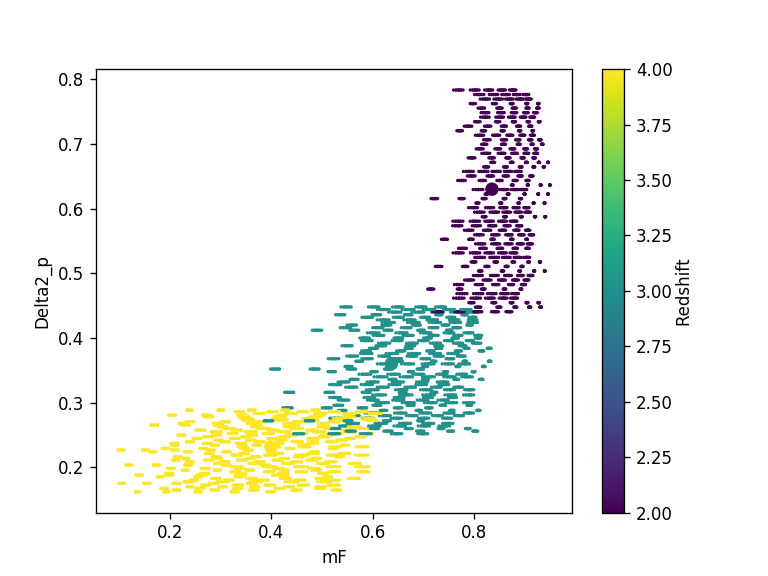

In [5]:
# compare the model we evaluate vs the entries in the archive
plt.figure()
like.overplot_emulator_calls(param_1='mF',param_2='Delta2_p')

<IPython.core.display.Javascript object>


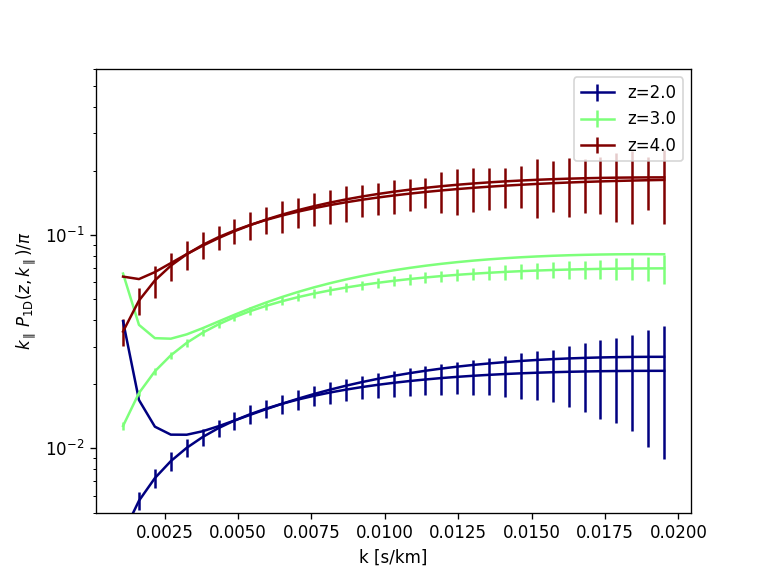

asked to emulate model {'Delta2_p': 0.6300728199380837, 'n_p': -2.2994793220516994, 'alpha_p': -0.2163759661951201, 'f_p': 0.9583552547543478, 'mF': 0.8344581456142232, 'gamma': 1.524949107828223, 'sigT_Mpc': 0.12762905152106743, 'kF_Mpc': 10.214640667246089}
asked to emulate model {'Delta2_p': 0.36031650137680626, 'n_p': -2.2994794594828254, 'alpha_p': -0.21637600594737977, 'f_p': 0.9813695511850136, 'mF': 0.6365, 'gamma': 1.439685410940299, 'sigT_Mpc': 0.12349763773898846, 'kF_Mpc': 12.581594387770235}
asked to emulate model {'Delta2_p': 0.23205325295753354, 'n_p': -2.299479861066885, 'alpha_p': -0.216376343226051, 'f_p': 0.9898232760729386, 'mF': 0.3991063822907449, 'gamma': 1.3768467416640016, 'sigT_Mpc': 0.10804807112864845, 'kF_Mpc': 14.922495585491115}


In [6]:
plt.figure()
like.plot_p1d()

## Compare neighboring emulators

We will compair the prediction (and uncertainties) from neighboring emulators

In [7]:
# get measured bins from data
k_kms=data.k
zs=data.z
Nz=len(zs)

In [8]:
# setup linear power using list of likelihood parameters (will need this to get g_star and expansion)
linP_model=like.theory.cosmo.get_linP_model(like_params=[])
linP_model.get_params()
# figure out emulator calls, one per redshift
emu_calls=like.theory.get_emulator_calls()

0 2.0000000300000003 <F>= 0.8344581456142232


<IPython.core.display.Javascript object>


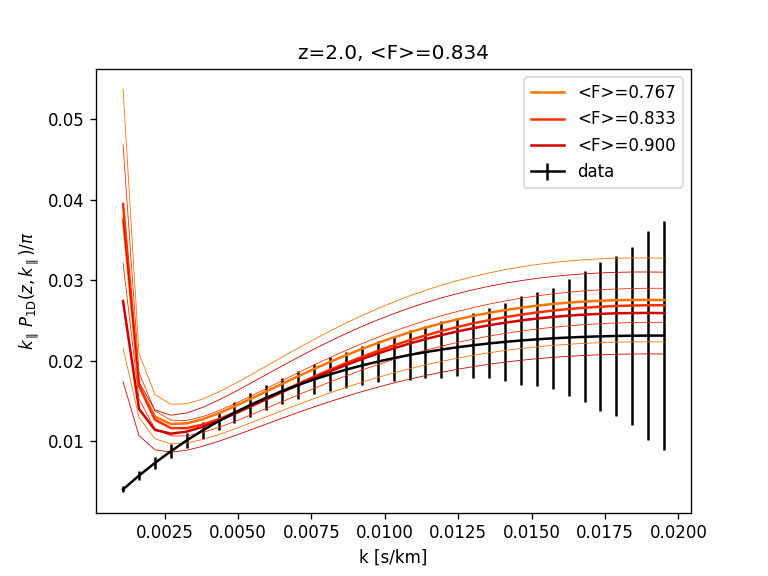

1 3.0 <F>= 0.6365


<IPython.core.display.Javascript object>


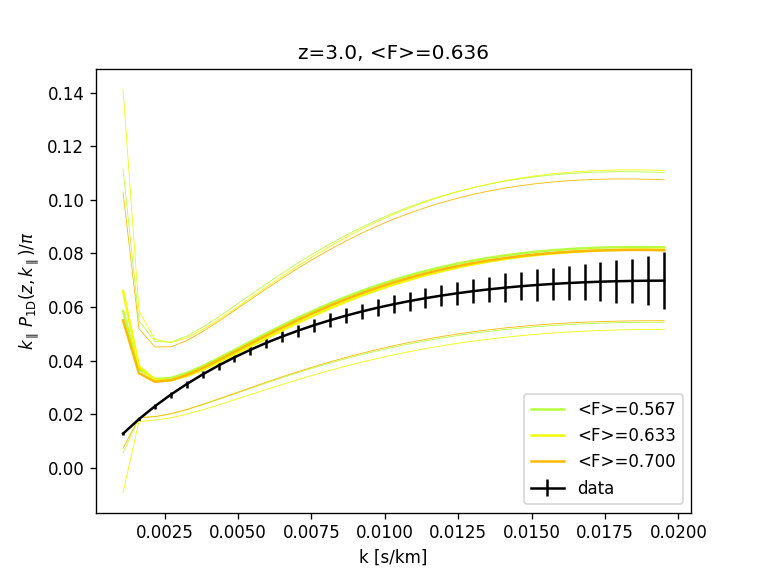

2 4.0 <F>= 0.3991063822907449


<IPython.core.display.Javascript object>


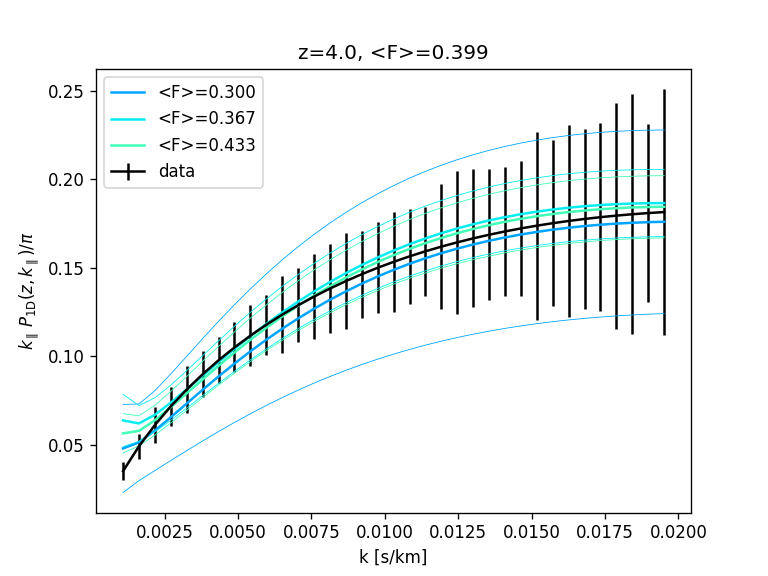

In [9]:
# loop over redshifts and compare P1D
for iz,z in enumerate(zs):
    # will call emulators for this model
    model=emu_calls[iz]
    mf=model['mF']
    print(iz,z,'<F>=',mf)
    # get data for this model
    p1d_data=data.get_Pk_iz(iz)
    p1d_cov=data.get_cov_iz(iz)
    # will use this to translate emulated P1D from Mpc to km/s
    dkms_dMpc=like.theory.cosmo.reconstruct_Hubble_iz(iz,linP_model)/(1+z)
    k_Mpc = k_kms * dkms_dMpc
    # start plot
    plt.figure()
    plt.errorbar(k_kms,p1d_data*k_kms/np.pi,color='black',
                yerr=np.sqrt(np.diag(p1d_cov))*k_kms/np.pi,label='data')
    plt.title('z=%.1f, <F>=%.3f'%(z,mf))
    # run over emulators in mean flux emulator
    for imf in range(emu.N_mf):
        cen_mf=emu.cen_mf[imf]
        # do not plot predictions from emulators that are very far away
        max_dmf=1.5/emu.N_mf
        if abs(cen_mf-mf)>max_dmf: continue
        p1d_Mpc_mf, cov_Mpc_mf = emu.emulators[imf].emulate_p1d_Mpc(model,k_Mpc,return_covar=True)
        p1d_kms_mf = p1d_Mpc_mf * dkms_dMpc
        cov_kms_mf = cov_Mpc_mf * dkms_dMpc**2
        err_kms_mf=np.sqrt(np.diag(cov_kms_mf))
        col = plt.cm.jet(imf/(emu.N_mf-1))
        plt.plot(k_kms,p1d_kms_mf*k_kms/np.pi,color=col,label='<F>=%.3f'%cen_mf)
        plt.plot(k_kms,(p1d_kms_mf+err_kms_mf)*k_kms/np.pi,color=col,lw=0.5)
        plt.plot(k_kms,(p1d_kms_mf-err_kms_mf)*k_kms/np.pi,color=col,lw=0.5)  
    plt.legend()
    plt.xlabel('k [s/km]')
    plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')